# Assignment 1

## Introduction
### Experimental design
This assignment is about a **within-subject 2x2 design** experiment, each participant is asked to respond to a target image following a prime image, both cue and target image have 2 different valences: *positive* and *negative*. Our aim is to investigate **whether there is any priming effect in participants' responses**, specificantly, whether people responded faster to positive images following a positive prime (relative to following a negative prime), and faster to negative images following a negative prime (relative to following a positive prime).

### Action statements
Here, I am going to do three things: 
1. Read in the data set;
2. Conduct descriptive representation and statistical analysis with appropriate methods  
    - repeated measure ANOVA with assumption check
    - linear mixed model
3. Conduct the post-hoc analysis to make an accurate inference.

Finally, I need to transform this code into three functions named: 
- `read_my_data()`;
- `run_my_anova()`;
- `pairwise_comparisons()`.

### Import packages
Before all the above actions, I loaded all the related packages used in the script with code `import`: a basic and the most common command in Python used to access the code in other downloaded modules. With code `as`, I could use the corresponding code I typed to invoke the module I imported. The modules I used in this assignment include:
- `pandas`: pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive.

- `numpy`: NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.

- `statsmodels`: is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. 

- `scipy`:provides more utility functions for optimization, stats and signal processing.

- `matplotlib`: is a comprehensive library for creating static, animated, and interactive visualizations in Python.

- `seaborn`: Seaborn is a Python data visualization library based on matplotlib. 

In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.anova import AnovaRM
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import statsmodels.stats.multicomp as mc
from statsmodels.graphics.factorplots import interaction_plot

Then I would define some common name to parameters in color so that I could invoke them easier and readable by readers.

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## 1. read_my_data() function
First, I start to build the read_my_data() function.
First, I use `read_csv` in `pd` package to read this csv dataset. I also add a new culomn called *condition* which combine the *prime* and *target* together which will make the format of data meets the requiement for some packages, such as `seaborn` and multiple contrast part. To keep the whole process clear and readable, I print a line with `print` saying where the data has been stored and tell the user could check a few rows of this data loaded. Then I return the `df.head()` to the user to help them to have a glance at the data and make sure everything is OK.

Also, you can see in the function define part, I use `color.Bold`,`color.END`,and `color.RED` to make the output description clearer to distinguish between each part.

In [3]:
def read_my_data(filename):
    df = pd.read_csv(filename)
    df['condition'] = df['prime'] + '_' + df['target']
    print(color.BOLD + 'Your data has been loaded successfully.Please check if the following information is correct! :)' + color.END)
    print()
    print(color.BOLD + 'Data type of each column of Dataframe:' + color.END)
    dataTypeSeries = df.dtypes
    print(dataTypeSeries)  
    print(color.BOLD + color.RED + '----------------------------------------------------------------------------------------' + color.END)
    print(color.BOLD + 'Head part of your data:' + color.END)
    print(df.head())
    return df

In [4]:
my_data = read_my_data('python_assignment_1.csv')

Your data has been loaded successfully.Please check if the following information is correct! :)

Data type of each column of Dataframe:
participant     int64
prime          object
target         object
rt              int64
condition      object
dtype: object
----------------------------------------------------------------------------------------
Head part of your data:
   participant          prime          target    rt  \
0            1  positiveprime  positivetarget  1502   
1            2  positiveprime  positivetarget  1535   
2            3  positiveprime  positivetarget  1563   
3            4  positiveprime  positivetarget  1492   
4            5  positiveprime  positivetarget  1560   

                      condition  
0  positiveprime_positivetarget  
1  positiveprime_positivetarget  
2  positiveprime_positivetarget  
3  positiveprime_positivetarget  
4  positiveprime_positivetarget  


Also, this line can also be used to load with url. (I have updated all the dataset on github so it will be easier to store or share with others.)

In [5]:
my_data = read_my_data('https://raw.githubusercontent.com/bingo1218/University_of_Manchester/main/Python_assignment1/python_assignment_1.csv')

Your data has been loaded successfully.Please check if the following information is correct! :)

Data type of each column of Dataframe:
participant     int64
prime          object
target         object
rt              int64
condition      object
dtype: object
----------------------------------------------------------------------------------------
Head part of your data:
   participant          prime          target    rt  \
0            1  positiveprime  positivetarget  1502   
1            2  positiveprime  positivetarget  1535   
2            3  positiveprime  positivetarget  1563   
3            4  positiveprime  positivetarget  1492   
4            5  positiveprime  positivetarget  1560   

                      condition  
0  positiveprime_positivetarget  
1  positiveprime_positivetarget  
2  positiveprime_positivetarget  
3  positiveprime_positivetarget  
4  positiveprime_positivetarget  


As for the results, you can see a line saying your data has loaded successfully, and can see the type of each column and the first few lines of your data.WIth `return`, we make data *df* has been stored into my_data

## 2. run_my_anova() function.

`run_my_anova()` function mainly comprises three components: 

**1. descriptive statistics**; 

In this part, I use the function in pands called `groupby` and `describe`:

- `groupby()` with this, I could classify the data by specific variable/condition, here, I am going to calculate the *response time* in every conditions (2x2 conditions), including prime(positive/negative) * target(positive/negative). With `["rt"]`, I select the *rt* specificantly.
    
- `describe()` this is a useful function in `pandas` to automatically calculate some common descriptive information. After `groupby`, we can calculate it simply.

Then I select the *rt* data in different conditions separately by following 4 lines. 
For example, in the first line, I used `==` and `&`, two determined statements, to only keep the `rt` when `prime` in `df` is equal to `positiveprime` but also `target` in `df` should be the same as `positivenegative`. Then I put these filtred `rt` into a new variable called *cpn* (condition: negative target following positive prime). The followings lines are the same except using different conditions.

We could also use `cpp = df[(df.condition == "positiveprime_positivetarget")].rt` to achieve the same function.

**2. data visualisation**; 

1. histogram plot

In the data visualization part, first, I use `plt.figure(1)` and `plt.figure(1)` so that the two plots can be shown independently. Then, I use `pandas.hist` to draw a histogram plot, this can show the reader the rough distribution of each condition. I also use parameter `a = 0.8` to adjust the transparency of this plot in order to make every condition can be viewed. Also, `figsize=(8,6)` means to specify the size of the plot area.

With `plt.legend`,`plt.ylabel` and `plt.title`, other parameters like legend, (y)label, and title of this plot can be determined.
    
2. Violin plot with scatter points

Then, a violin plot is always a good way to show the comprehensive information of the distribution of the data, and scatter is a useful way to show every individual completely. Combing them would be informative and one of the most common formats used for data visualization.

I use the `Seaborn`pakage to draw and do this easily. First, I set the plotting context parameters with `sns.set_context`, here `csns.set_context('paper')` sets up a number of parameters that will define how seaborn produces plots I generate using the module. Then, I use `sns.violinplot` firstly to make a violin plot and then use `sns.stripplot`to add jittered data points as another layer on the violin plot.
    
3. bar plot

With this code, I use invoke the defalt color parameter of `matplotlib` with `plt.rcParams['axes.prop_cycle'].by_key()['color']` and put them in to a variable called *cycle*. Then I use set `width`, and use `np.arange(0.25,2)-width` as the position of the data I would like to put.

Although actually there is no need to conduct this reductant operation, I keep it here in case anyone wants to change the function to their own data with a huge number of conditions where need more color and more position to use, which will make their work easier.
    
With `np.mean()`and `np.std()`, I could calculate the mean std value of each condition.

Then I use `plt.bar` twice to draw the bar chart, with the position I select above and *mean* value calculated above as *y* as well as standard difference by `yerr=` for different conditions.
    
    
**3. repeated measure ANOVA**.

After data visualization, I started to conduct the 2x2 RM-ANOVA. Here, I use the function `AnovaRM().fit()` in `statsmodels` package.Here,I specify the 2 * 2 independent factors as well as the dependent variables and subject variable. 

Also, I left `aggregate_func='mean'` function here in case the data set contains more than a single observation per subject and cell of the specified model, it can be used to aggregate the data before running the Anova.

Then I use `print()`, `dislay()` and `plt.show()` to list all my plots and tables with dividing lines and hint words.

In [6]:
def run_my_anova(df):
    # descriptive analysis
    descrip = df.groupby(["prime", "target"])["rt"].describe()
    

    cpp = df[(df.prime == "positiveprime") & (df.target == "positivetarget")].rt
    cnn = df[(df.prime == "negativeprime") & (df.target == "negativetarget")].rt
    cpn = df[(df.prime == "positiveprime") & (df.target == "negativetarget")].rt
    cnp = df[(df.prime == "negativeprime") & (df.target == "positivetarget")].rt
    
    # Data visualisation
    # plot figure 1: histgram data
    plt.figure(1)
    df.groupby(["prime", "target"])["rt"].hist(alpha=0.8)
    plt.legend(['negprime-negtarget','negprime-postarget','posprime-negtarget','posprime-postarget'],loc=1)
    plt.ylabel('Frequency', fontsize='14')
    plt.title("Histgram plot of rt in 4 conditions")
    
    # plot figure 2: Violin plot with scatter plot
    plt.figure(2,figsize=(8,6))
    sns.set_context("paper", font_scale=1.5)
    sns.violinplot(y="rt", 
                    x="condition", 
                    data=df)
    sns.stripplot(y="rt",
                    x="condition", 
                    data=df,
                  color="black", edgecolor="gray")
    plt.xticks(rotation=30, fontsize = 10)
    plt.ylabel('Reponse time (ms.)')
    plt.title('Violinplot with points stripplot')
    #plt.savefig("Seaborn_violinplot_with_points_stripplot.png", format='png',dpi=150)# we could also save it with this code.

    # plot figure 3: bar plot
    plt.figure(3)
    cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    width = 0.25
    plt.bar(np.arange(0.25,2)-width,[np.mean(cpn),np.mean(cnp)],width,yerr=[np.std(cpn),np.std(cnp)], align='center',ecolor = 'black', capsize=10)
    plt.bar(np.arange(0.25,2),[np.mean(cnn),np.mean(cpp)],width,color=cycle[1],yerr=[np.std(cnn),np.std(cpp)], align='center', ecolor = 'black', capsize=10)
    plt.legend(['inconsistent prime','consistent prime'],loc=1)
    plt.ylim([1400,1700])
    plt.xticks([0.125,1.125],['negative target','positive target'], fontsize='14')
    plt.ylabel('Response Time (ms.)', fontsize='14')
    plt.title("The bar plot of response time in different conditions")
    
    # two way repeated measure anova
    
    aovrm2way = AnovaRM(df, 'rt', 'participant', within=['prime', 'target'],aggregate_func=None)
    res2way = aovrm2way.fit()
    
    # Display all tables and pictures
    print(color.BOLD + 'The descriptive statistics:' + color.END)
    display(descrip)
    
    print(color.BOLD + color.DARKCYAN + '----------------------------------------------------------------------------------------' + color.END)
    print(color.BOLD + 'Data visualisation:' + color.END)
    plt.show()
    
    print(color.BOLD + color.DARKCYAN + '----------------------------------------------------------------------------------------' + color.END)
    print(color.BOLD + 'Repeated measure 2 way ANOVA' + color.END) 
    print(res2way)

The descriptive statistics:


count         mean        std     min      25%  \
prime         target                                                           
negativeprime negativetarget  148.0  1547.256757  52.382700  1417.0  1507.50   
              positivetarget  148.0  1562.648649  50.468400  1440.0  1533.25   
positiveprime negativetarget  148.0  1566.959459  54.016737  1448.0  1528.50   
              positivetarget  148.0  1547.391892  44.879072  1430.0  1513.00   

                                 50%      75%     max  
prime         target                                   
negativeprime negativetarget  1550.5  1580.50  1710.0  
              positivetarget  1562.0  1587.00  1736.0  
positiveprime negativetarget  1570.5  1602.25  1694.0  
              positivetarget  1550.5  1584.25  1637.0

----------------------------------------------------------------------------------------
Data visualisation:


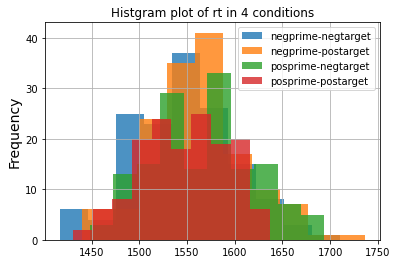

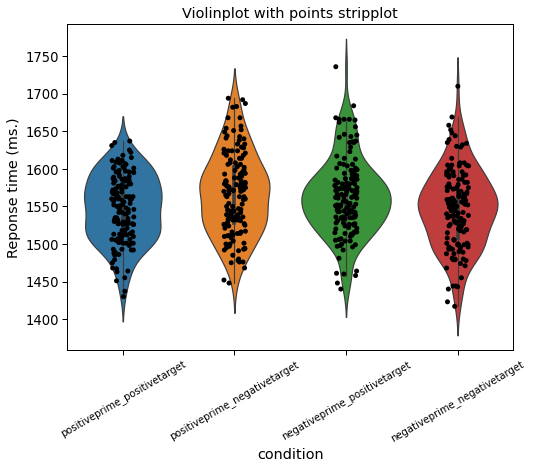

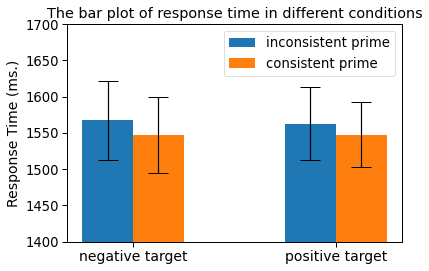

----------------------------------------------------------------------------------------
Repeated measure 2 way ANOVA
                   Anova
             F Value Num DF  Den DF  Pr > F
-------------------------------------------
prime         0.3132 1.0000 147.0000 0.5766
target        0.2365 1.0000 147.0000 0.6275
prime:target 17.1778 1.0000 147.0000 0.0001



In [7]:
run_my_anova(my_data)

For the outputs, we could see that after running the `run_my_anova()` function, we get clear statistical information on response time in 4 conditions. Besides, we get a histogram plot that shows the distribution of the data, a nice violin plot with actual data points on top of it (here we have customized the jittered data color to black), and a bar plot of the data.

Although the bar plot is not as informative as the violin plot, I tend to keep this here, because this kind of picture is the most common and easy-to-understand plot, especially for the public. What's more, this bar plot presents more about the priming effect towards our study aim, here I define *inconsistent target* and *consistent target*, it can answer our question intuitively, namely, participant seems to respond faster when the valence of the target is consistent with the prime relative to when the valence is inconsistent.
Furthermore, according to the 2x2 repeated measure ANOVA analysis, there are significant differences in these situations.

**Results** 

A study was designed to determine the priming effect of the different valence of words. The study assessed the response time toward target words in positive/negative conditions following priming words in positive/negative conditions. The overall interaction between the two factors was statistically significant, *F*(1, 147)= 17.18, *p*-value < 0.001.

But what this interaction means? We need a post-hoc analysis to get the final inference so as to answer our question.

## 3. pairwise_comparisons() function

In this section, I use `multicomp` and `allpairtest` functions in `statsmodels` to conduct pairwise comparisons.

First, I use `tukeyhsd()` to draw a picture after multiple comparisons, although this is used to get the Tukey corrected p-value, I omit other information but just keep the picture to give intuition to the reader about the comparison test firstly. When there is no overlap between two groups, it suggests there is a significant difference.

Second, I use `allpairtest` to get the statistic value. Similarly, this requires choosing a method (here, I choose *sidak*) to correct the P-value. However, it means we want to comprise six times, we know it's not what we want. We only need comprise for two times, including: 
- positive images following a positive prime (vesus following a negative prime), 
- negative images following a negative prime (vesus following a positive prime).

So, let's just see the **pval** rather than the **pval_corr** in the table (similarly, if one want to comparise between all the conditions, they can specify the *sidak* or *bonferroni*, keeping this line could be easier for them to do so).

Then,I use `interaction_plot` in `statsmodels` to draw the interaction plo, specifing the dv (response time) and iv (target and prime).

In [8]:
def pairwise_comparisons(df):
    comp = mc.MultiComparison(df['rt'], df['condition'])
    post_hoc_res = comp.tukeyhsd()
    
    post_hoc_res.summary()
    post_hoc_res.plot_simultaneous(ylabel= "Condition", xlabel= "Response time")
    plt.title("Multiple Comparisons Between All pairs")
    
    tbl, a1, a2 = comp.allpairtest(stats.ttest_rel, method= "sidak")
    
    grouped_data = df.groupby(['prime', 'target'])
    group_means = grouped_data['rt'].mean()
    group_means
    data_to_plot = pd.DataFrame(group_means).reset_index()

    my_interaction_plot = interaction_plot(x=data_to_plot['target'], trace=data_to_plot['prime'], 
                                           response=data_to_plot['rt'], colors=['red', 'blue'], 
                                           markers=['D', '^'])
    plt.xlabel('Target')
    plt.ylabel('RT (ms.)')
    plt.title('Reaction Times to Target Type as a Function of Prime Type')

    display(tbl)
    print(color.BOLD + color.DARKCYAN + '----------------------------------------------------------------------------------------' + color.END)
    print(color.BOLD + 'Data visualisation:' + color.END)
    plt.show() 

group1,group2,stat,pval,pval_corr,reject
negativeprime_negativetarget,negativeprime_positivetarget,-2.5748,0.011,0.0643,False
negativeprime_negativetarget,positiveprime_negativetarget,-3.1322,0.0021,0.0125,True
negativeprime_negativetarget,positiveprime_positivetarget,-0.0241,0.9808,1.0,False
negativeprime_positivetarget,positiveprime_negativetarget,-0.7099,0.4789,0.98,False
negativeprime_positivetarget,positiveprime_positivetarget,2.9064,0.0042,0.0251,True
positiveprime_negativetarget,positiveprime_positivetarget,3.2296,0.0015,0.0091,True


----------------------------------------------------------------------------------------
Data visualisation:


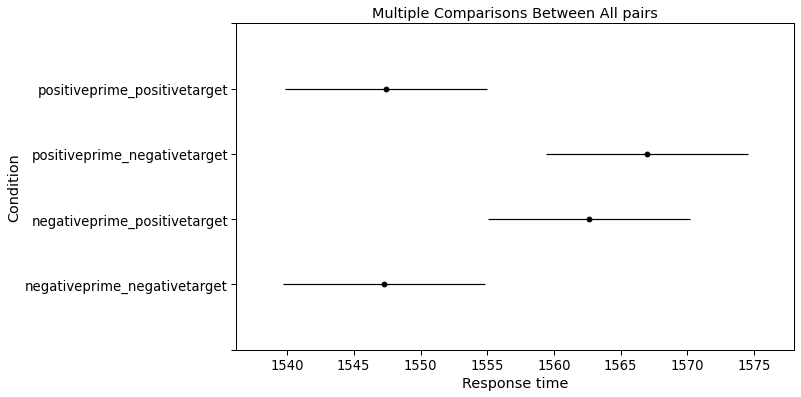

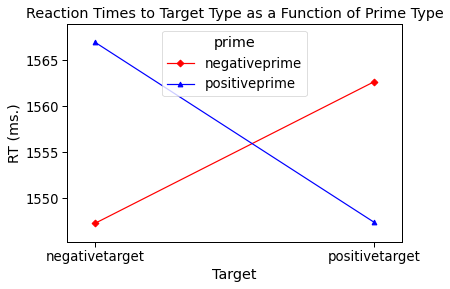

In [9]:
pairwise_comparisons(my_data)

Considering our research aim, we should focus on the line 5 and line 2 in the table.

Now, accouding to the results, we could see that there is a siginicant differnece between the, suggesting people responded faster to positive images following a positive prime (relative to following a negative prime)(*t* = 2.91, adjusted-*p* = 0.008), and faster to negative images following a negative prime relative to following a positive prime (*t* = -3.13, adusted-*p* = 0.004).

<span style = "font-family: Times New Roman; font-size: 1em; color: BLUE"> *Finally, I would like to finish with a meme to myself.* </span>

![(an image caption Source: network)](pic.jpg)

<span style = "font-family: monospace; font-size: 2em; color: BLACK"> *Thanks for your patience and effort!* </span>